# DataLoader

In [1]:
import h5py
import numpy as np

In [2]:
dataList=['../data/normal_dataset.h5','../data/Anomaly_dataset.h5']

In [3]:
imageList=[]
labelList=[]
for file_path in dataList:
    print('Loading data from ', file_path)
    dataset = h5py.File(file_path,'r',libver='latest',swmr=True)
    FimageList=[]
    FlabelList=[]
    for gName,group in dataset.items():
        for dName,data in group.items():
            if dName == 'images':
                FimageList.append(data)
            elif dName == 'labels':
                FlabelList.append(data)

    if len(FimageList) >= 2:
        #print("More than 2 gropus in File")
        image_concat = []
        for i in range(0,len(FimageList)):
            image_concat.append(FimageList[i][:])
        imageList.append(np.concatenate(image_concat))
        label_concat = []
        for i in range(0,len(FlabelList)):
            label_concat.append(FlabelList[i][:])
        labelList.append(np.concatenate(label_concat))
    else:
        imageList.append(FimageList[0][:])
        labelList.append(FlabelList[0][:])
imageList = np.concatenate(imageList)
labelList = np.concatenate(labelList)
print('input image shape : ',imageList.shape)
print('input label shape : ',labelList.shape)

Loading data from  ../data/normal_dataset.h5
Loading data from  ../data/Anomaly_dataset.h5
input image shape :  (72100, 1, 28, 28)
input label shape :  (72100,)


In [4]:
import matplotlib.pyplot as plt

# Noise (1). Salt & Pepper

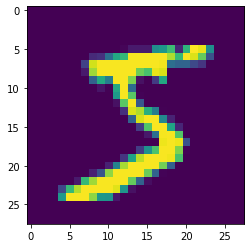

In [12]:
testImage = imageList[0][0].copy()
plt.imshow(testImage)

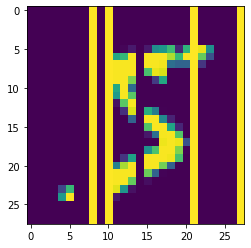

In [13]:
drop = np.arange(testImage.shape[1])
np.random.shuffle(drop)
sep = int(len(drop)*0.3)
drop = drop[:sep]
testImage[:,drop[:int(sep/2)]]=0
testImage[:,drop[int(sep/2):]]=1

plt.imshow(testImage)

# Noise (2). Gaussian Noise

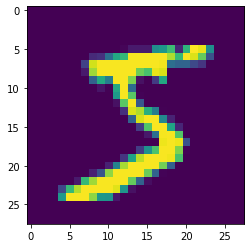

In [14]:
testImage = imageList[0][0].copy()
plt.imshow(testImage)

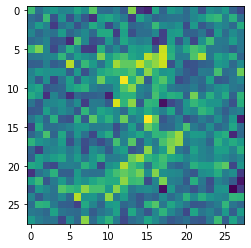

In [15]:
testImage += np.random.normal(0,0.5,testImage.shape)
plt.imshow(testImage)

# Noise (3). Masking Noise

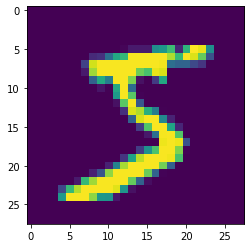

In [16]:
testImage = imageList[0][0].copy()
plt.imshow(testImage)

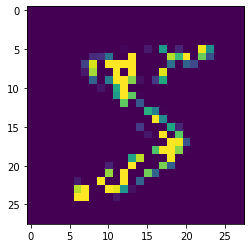

In [17]:
mask = (np.random.uniform(0,1,testImage.shape)<0.5).astype('i4')
testImage = mask*testImage
plt.imshow(testImage)